In [1]:
import pandas as pd

from ml_pairs import MLPairs

from utils import mp_dataset_av

# Download data from Alpha Vantage

### Grab your API key at https://www.alphavantage.co/

In [2]:
# API_KEY = None

# tickers = list(
#     pd.read_csv(
#         "dataset/constituents.csv",
#         usecols=["Symbol"]).values.flatten()
# )

# mp_dataset_av(
#     universe=tickers,
#     interval='5min',
#     time_slices=['year1month1', 'year1month2', 'year1month3', 'year1month4'],
#     api_key=API_KEY
# )

In [3]:
df = pd.read_csv('dataset/universe.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df = df.between_time('09:00', '16:00') # the dataset has extended trading hours.
df.dropna(
    axis=0, 
    thresh=int(0.8 * len(df.columns)), # we will keep the rows with 80% non-NaN values.
    inplace=True
)
df.dropna(
    axis=1, 
    thresh=int(0.8 * len(df.columns)), # we will keep the columns with 80% non-NaN values.
    inplace=True
)
df.ffill(inplace=True)
df.fillna(0, inplace=True)

# A. Dimensionality reduction

The first step towards this direction consists in finding a compact representation for each asset, starting from its price series.

2020-10-14 19:40:09,694 - [ml_pairs:INFO] - Begining Part A. Dimensionality reduction.


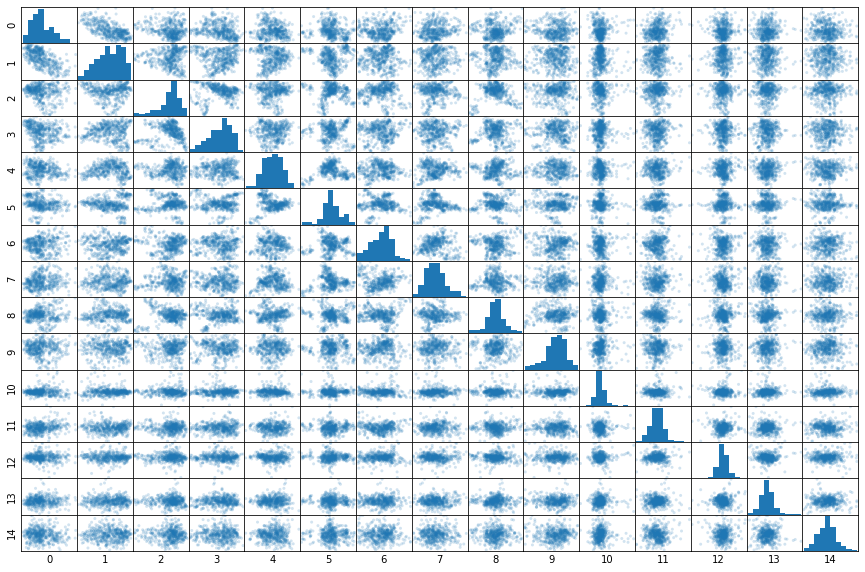

In [4]:
mlp = MLPairs(df, seed=19)
mlp.dim_reduction(top_k=15)
mlp.plot_principle_components()

# B. Unsupervised Learning clustering

- dbscan
- optics

2020-10-14 19:40:16,338 - [ml_pairs:INFO] - Begining Part B. Unsupervised Learning Clustering using dbscan
2020-10-14 19:40:16,359 - [ml_pairs:INFO] - Total number of candidate pairs (before clustering): 125751.
2020-10-14 19:40:16,363 - [ml_pairs:INFO] - Total number of candidate pairs (after clustering): 12429.


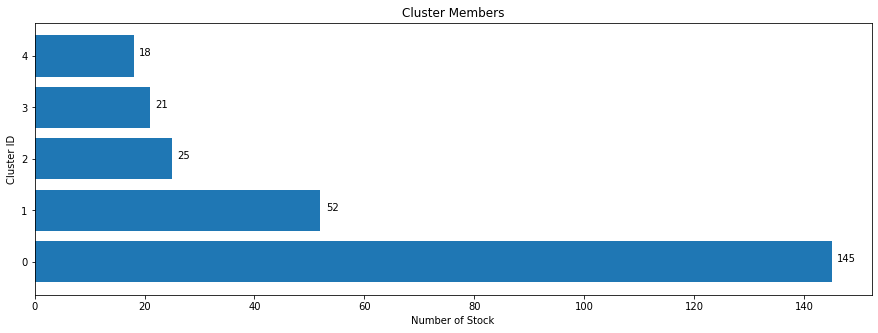

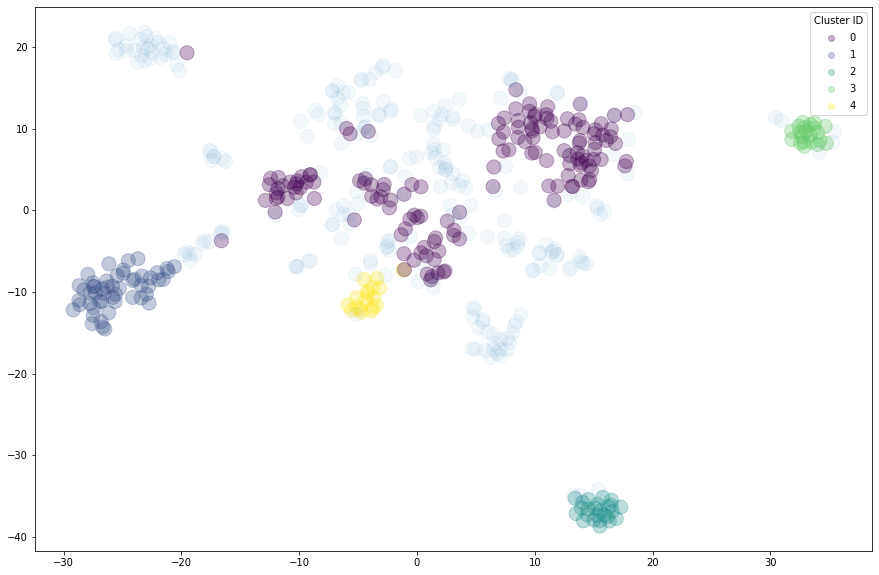

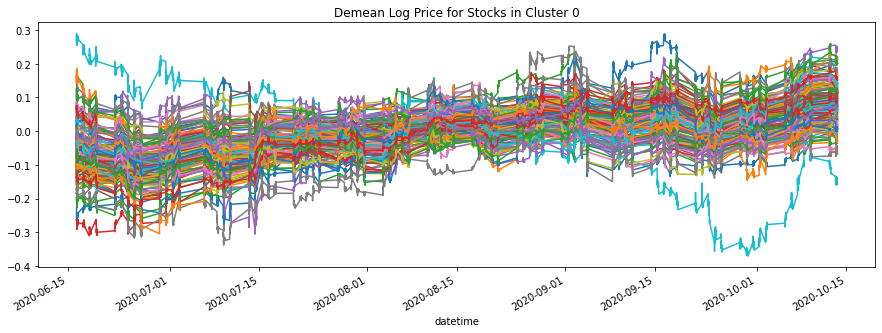

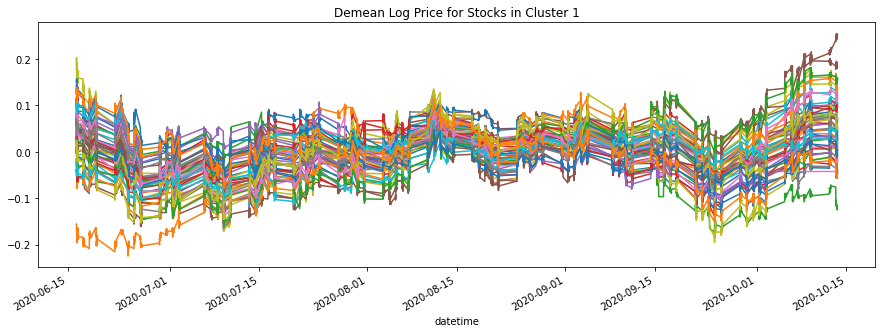

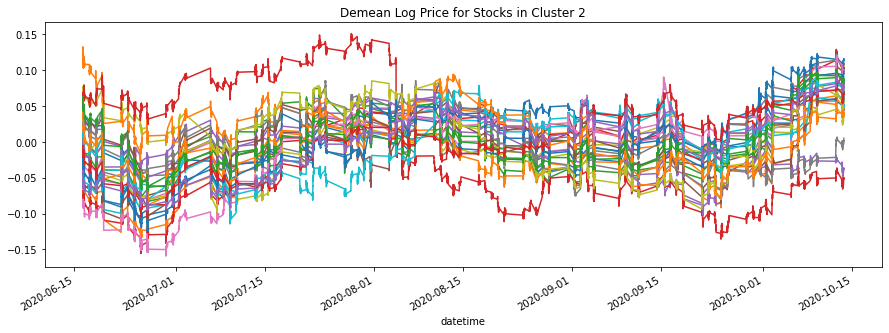

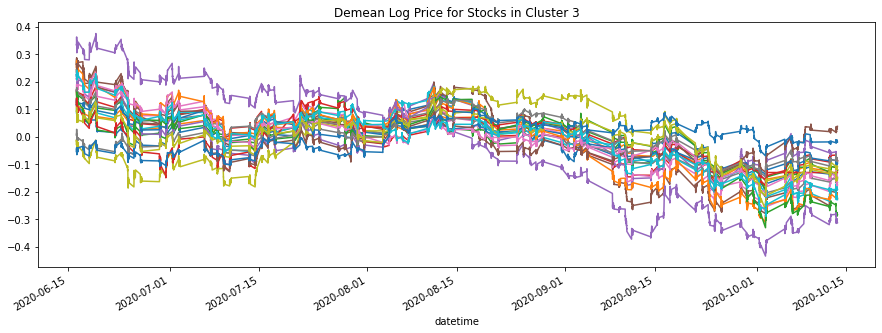

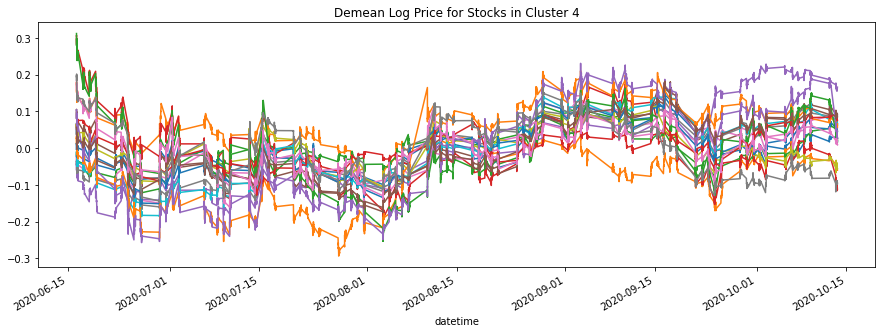

In [5]:
mlp.clustering(
    technique='dbscan', 
    params={
        'min_samples': 15,
        'eps': .1
    }
)
mlp.plot_cluster_members(figsize=(15, 5))
mlp.plot_tsne(
    params={
        'perplexity': 30,
        'learning_rate': 200
    }
)
for cluster_id in sorted(mlp.valid_cluster_ids['cluster_id'].unique().tolist()):
    mlp.plot_cluster_ts(cluster_id=cluster_id, figsize=(15, 5))

2020-10-14 19:40:19,614 - [ml_pairs:INFO] - Begining Part B. Unsupervised Learning Clustering using optics
2020-10-14 19:40:19,922 - [ml_pairs:INFO] - Total number of candidate pairs (before clustering): 125751.
2020-10-14 19:40:19,925 - [ml_pairs:INFO] - Total number of candidate pairs (after clustering): 3023.


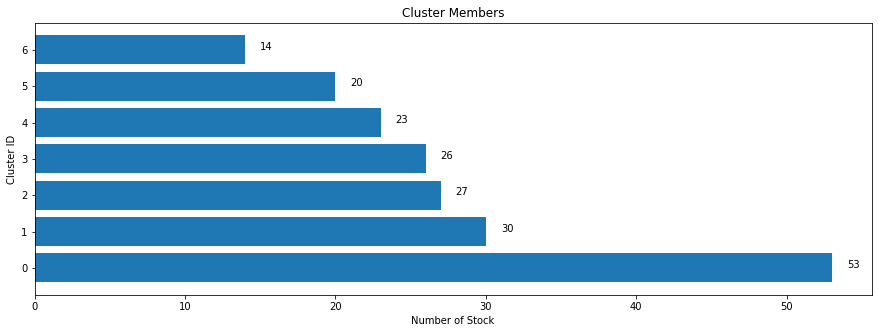

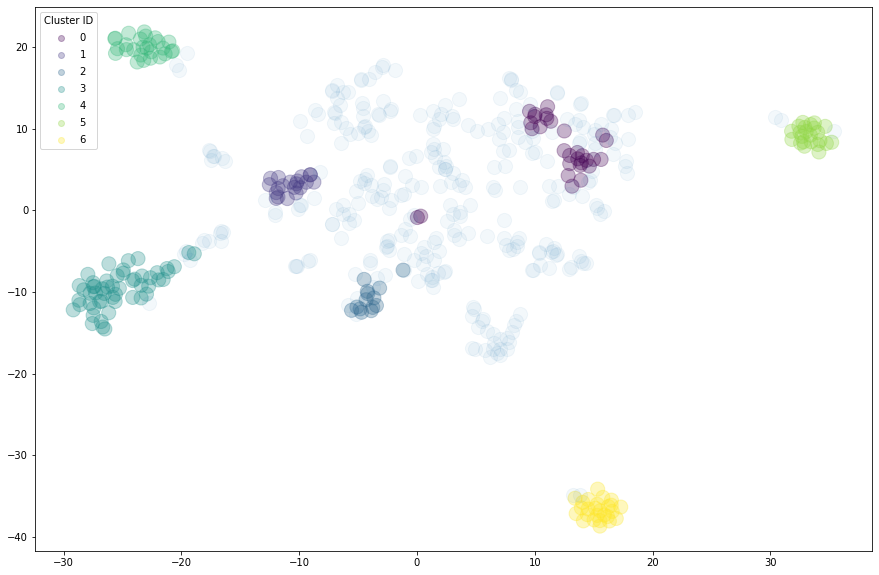

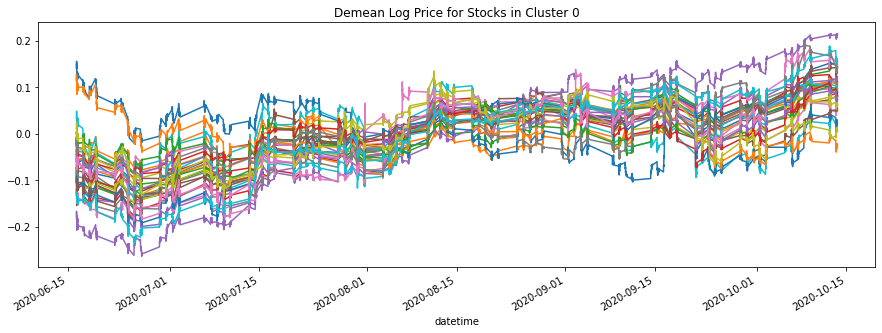

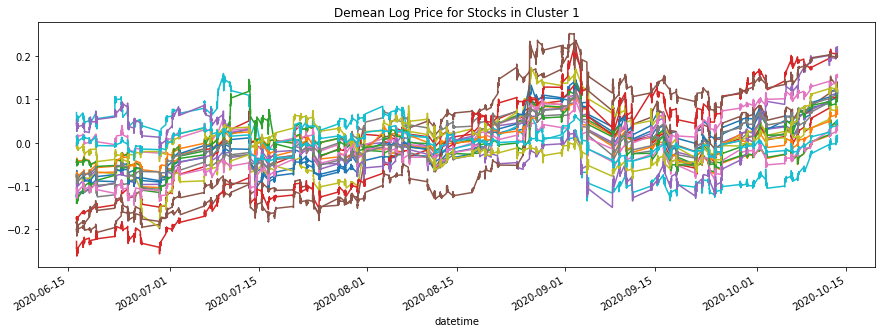

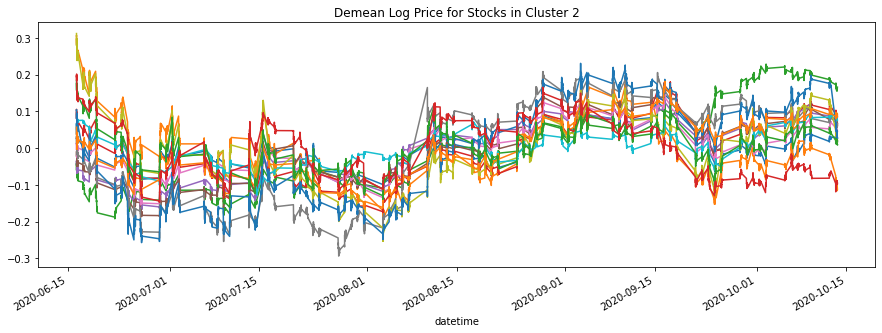

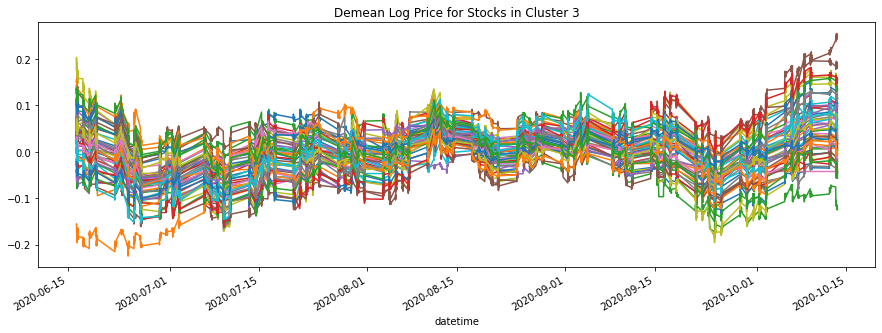

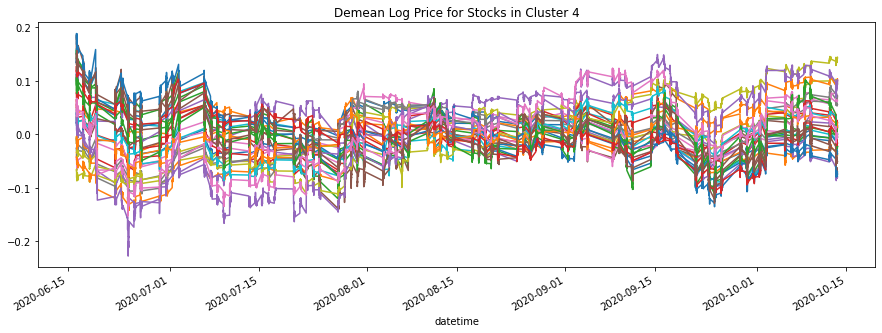

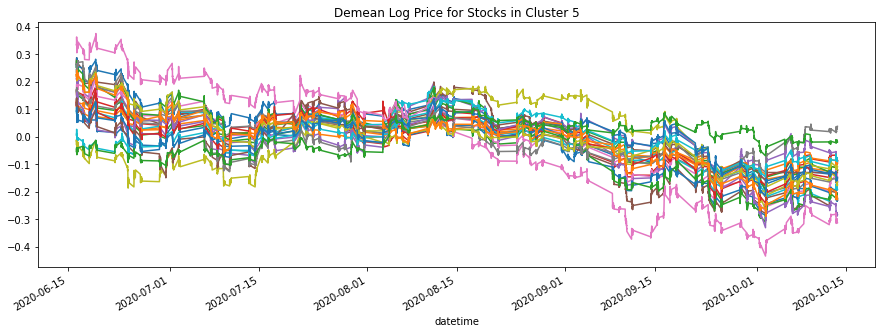

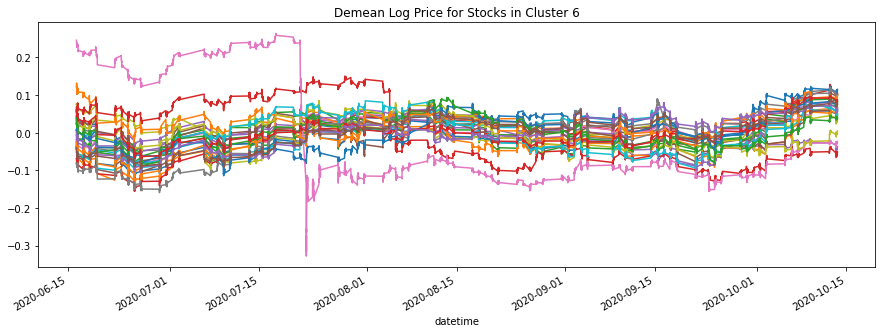

In [6]:
mlp.clustering(
    technique='optics',
    params={
        'min_samples': 15,
        'xi': .01,              # Determines the minimum steepness on the reachability plot that constitutes a cluster boundary.
        'min_cluster_size': .01
    },
)
mlp.plot_cluster_members(figsize=(15, 5))
mlp.plot_tsne(
    params={
        'perplexity': 30,
        'learning_rate': 200
    }
)
for cluster_id in sorted(mlp.valid_cluster_ids['cluster_id'].unique().tolist()):
    mlp.plot_cluster_ts(cluster_id=cluster_id, figsize=(15, 5))

In [7]:
mlp.pairs_selection(max_lag=100, convenient_periods=7, mp=True)
mlp.selected_pairs

100%|██████████████████████████████████████████████████████████████████████████████| 3023/3023 [18:38<00:00,  2.70it/s]
2020-10-14 19:59:01,909 - [ml_pairs:INFO] - Total number of selected pairs: 171.


[['AFL', 'AIZ'],
 ['AFL', 'COF'],
 ['AFL', 'CFG'],
 ['AFL', 'CMA'],
 ['AFL', 'FITB'],
 ['AFL', 'GL'],
 ['AFL', 'PNC'],
 ['AFL', 'RJF'],
 ['AFL', 'SIVB'],
 ['AFL', 'SYF'],
 ['AFL', 'UNM'],
 ['AIG', 'AIZ'],
 ['AIG', 'CB'],
 ['AIG', 'PBCT'],
 ['AIG', 'SYF'],
 ['AMP', 'FRC'],
 ['AMP', 'WFC'],
 ['AON', 'WFC'],
 ['AIZ', 'WFC'],
 ['BLK', 'USB'],
 ['BLK', 'WFC'],
 ['COF', 'DFS'],
 ['COF', 'FITB'],
 ['COF', 'WFC'],
 ['CB', 'LNC'],
 ['CB', 'PBCT'],
 ['CB', 'WFC'],
 ['CINF', 'MET'],
 ['CINF', 'WFC'],
 ['DFS', 'USB'],
 ['DFS', 'WFC'],
 ['ETFC', 'WFC'],
 ['RE', 'HIG'],
 ['FRC', 'USB'],
 ['FRC', 'WFC'],
 ['BEN', 'USB'],
 ['GL', 'WFC'],
 ['HIG', 'LNC'],
 ['IVZ', 'USB'],
 ['JPM', 'MET'],
 ['JPM', 'UNM'],
 ['KEY', 'SIVB'],
 ['LNC', 'TRV'],
 ['L', 'MET'],
 ['L', 'WFC'],
 ['MMC', 'MET'],
 ['MMC', 'WFC'],
 ['MET', 'SIVB'],
 ['MET', 'TROW'],
 ['MET', 'UNM'],
 ['MET', 'WFC'],
 ['MS', 'WFC'],
 ['PBCT', 'SYF'],
 ['PNC', 'SIVB'],
 ['PRU', 'WFC'],
 ['RJF', 'SIVB'],
 ['RJF', 'WFC'],
 ['STT', 'WFC'],
 ['SIVB', 'U